<a href="https://colab.research.google.com/github/geetha2612/Health_care_data_analysis/blob/main/Gene_Cluster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(color_codes=True)  # for plot styling
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
!pip install xlrd

In [23]:
data = pd.read_csv("/content/drive/MyDrive/Data_Cortex_Nuclear.csv", header = 0)
data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


Deleting samples with empty values and unimportant columns

In [24]:
data = data.dropna()
data = data.drop(['Behavior','Genotype','MouseID','Treatment'], axis=1)
data.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
75,0.649781,0.828696,0.405862,2.921435,5.167979,0.207174,0.176640,3.728084,0.239283,1.666579,...,0.139052,0.112926,0.132001,0.129363,0.486912,0.125152,0.146865,0.143517,1.627181,c-CS-m
76,0.616481,0.841974,0.388584,2.862575,5.194163,0.223433,0.167725,3.648240,0.221030,1.565150,...,0.133787,0.121607,0.139008,0.143084,0.467833,0.112857,0.161132,0.145719,1.562096,c-CS-m
77,0.637424,0.852882,0.400561,2.968155,5.350820,0.208790,0.173261,3.814545,0.222300,1.741732,...,0.142324,0.130261,0.134804,0.147673,0.462501,0.116433,0.160594,0.142879,1.571868,c-CS-m
78,0.576815,0.755390,0.348346,2.624901,4.727509,0.205892,0.161192,3.778530,0.194153,1.505475,...,0.133637,0.107321,0.118982,0.121290,0.479110,0.102831,0.144238,0.141681,1.646608,c-CS-m
79,0.542545,0.757917,0.350051,2.634509,4.735602,0.210526,0.165671,3.871971,0.194297,1.531613,...,0.133358,0.112851,0.128635,0.142617,0.438354,0.110614,0.155667,0.146408,1.607631,c-CS-m


Pointing out where my Class column is

In [25]:
sample = data.pop('class')
sample.head()

75    c-CS-m
76    c-CS-m
77    c-CS-m
78    c-CS-m
79    c-CS-m
Name: class, dtype: object

Creating a dendrogram with heatmap to visualize the data

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


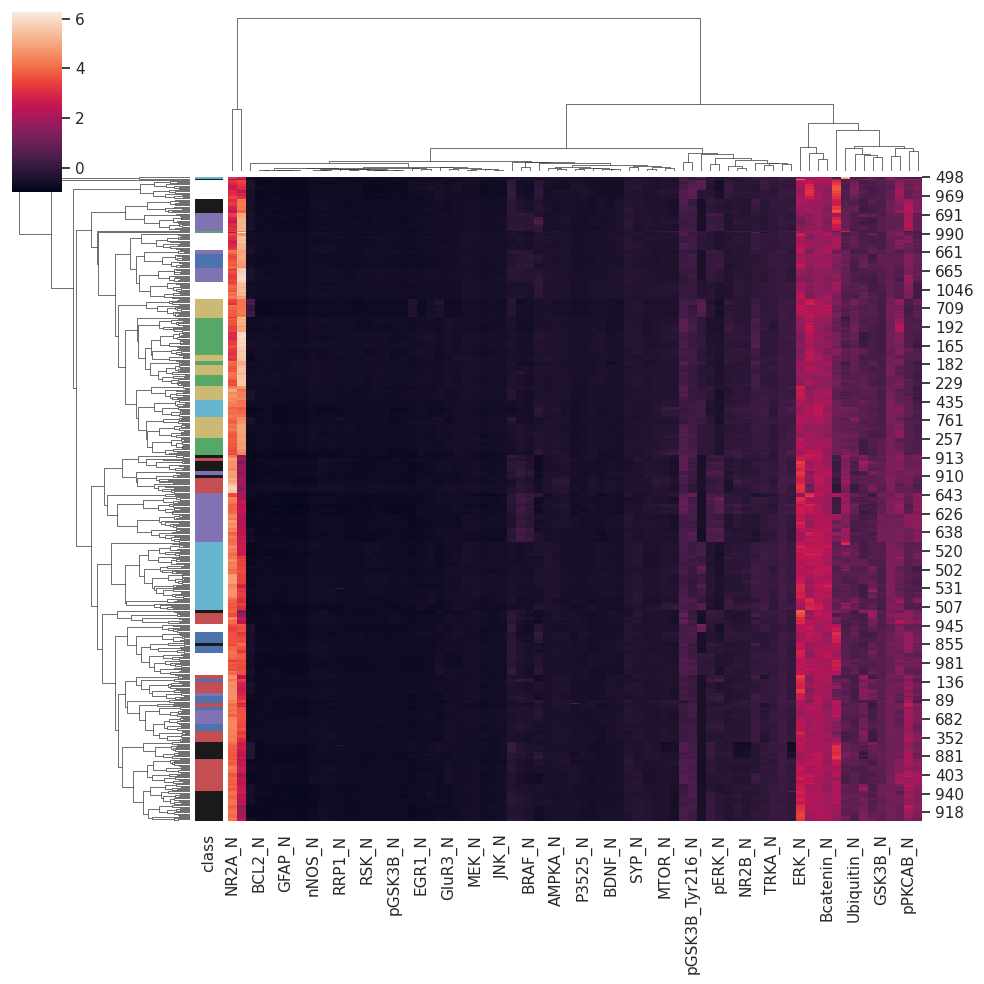

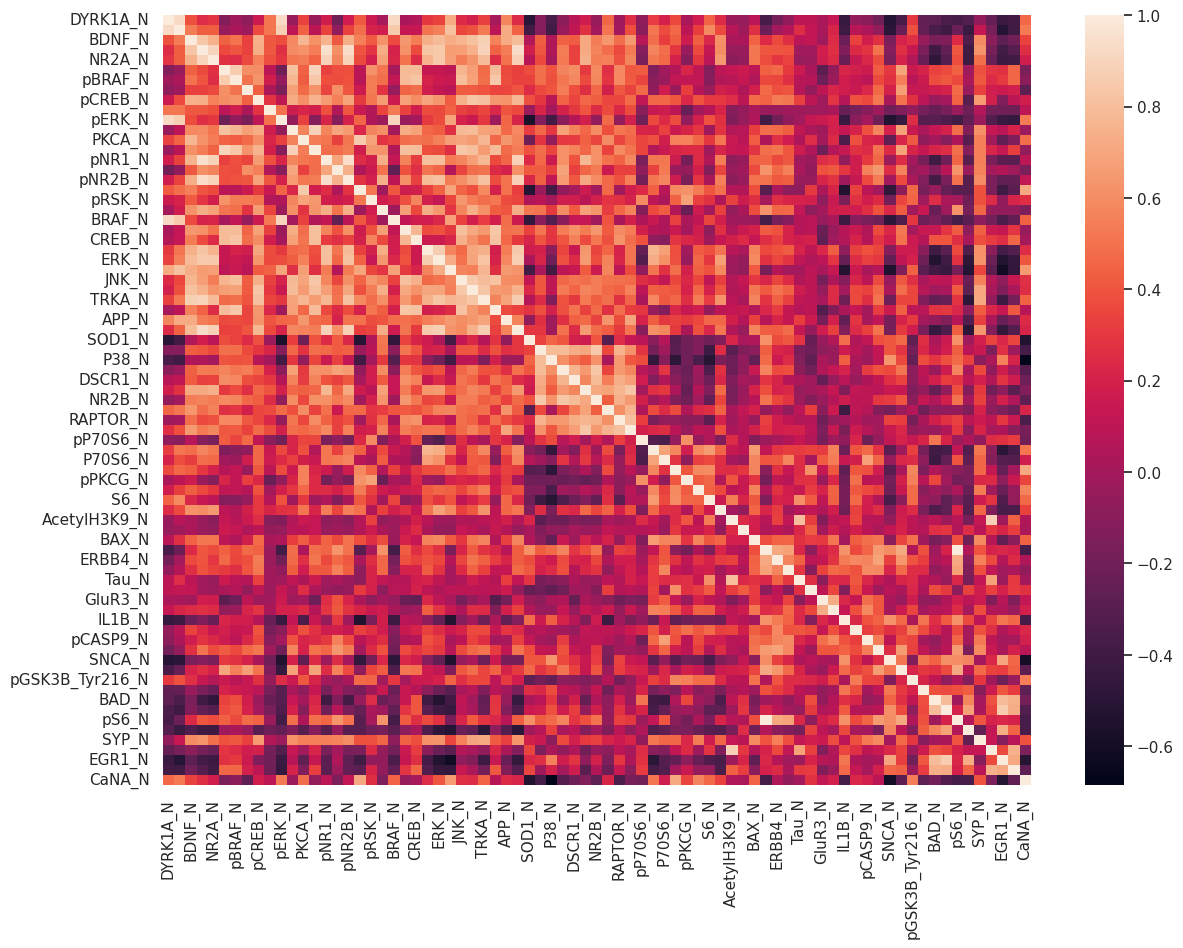

In [26]:
#Creating a colour palette for the dendrogram
lut = dict(zip(sample.unique(),'bgrcmykw'))
row_colors = sample.map(lut)
row_colors.head()

#Creating a dendrogram with heatmap to visualise data
data_a = pd.DataFrame(data)
g = sns.clustermap(data_a,row_colors=row_colors, z_score=0,)

#Scaling data  to graph a heat map in terms of correlation coefficient
data_s = preprocessing.scale(data)
data_s = pd.DataFrame(data)

#Correlation matrix and heatmap
data_s.corr()
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
ax=sns.heatmap(data_s.corr())

Creating clusters using Ward's

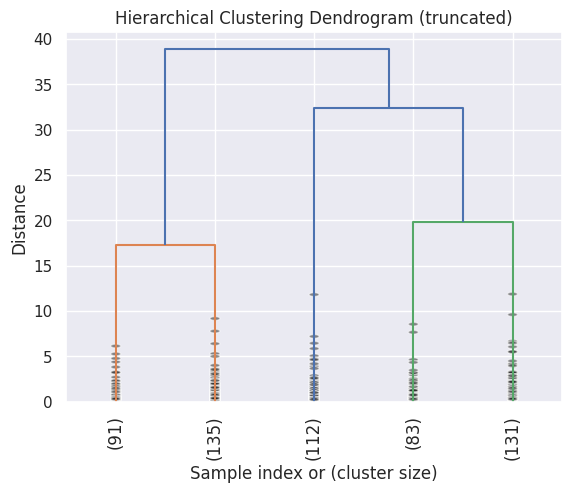

In [27]:
plt.figure()
H_cluster = linkage(data_s,'ward')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

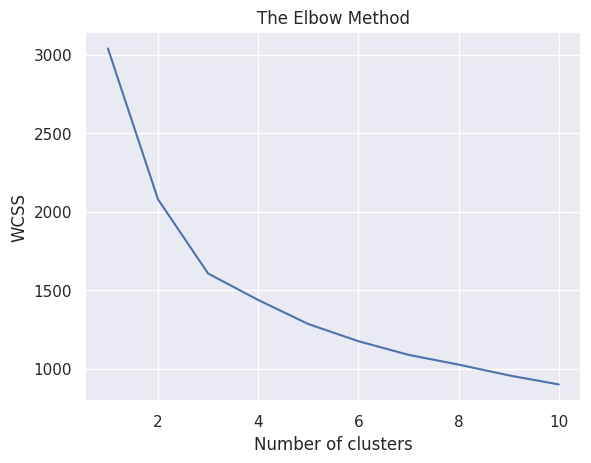

In [28]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    #kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Principal components analysis (PCA)

In [29]:
pca=PCA()

#Fit PCA to the dataset (only variables, excluding class)
pca.fit(data)

#Calculating rotated PCA scores
datatrans=pca.transform(data)
classes=sample

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


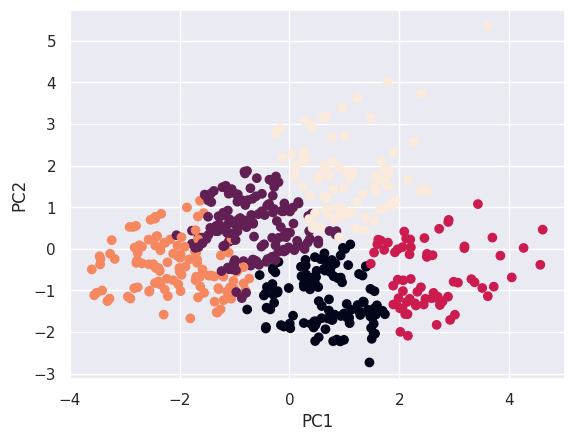

In [30]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
pred_kmeans = kmeans.fit_predict(data_s)
pred_kmeans = pred_kmeans+1

plt.figure()
plt.scatter(datatrans[:,0],datatrans[:,1],c=pred_kmeans)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

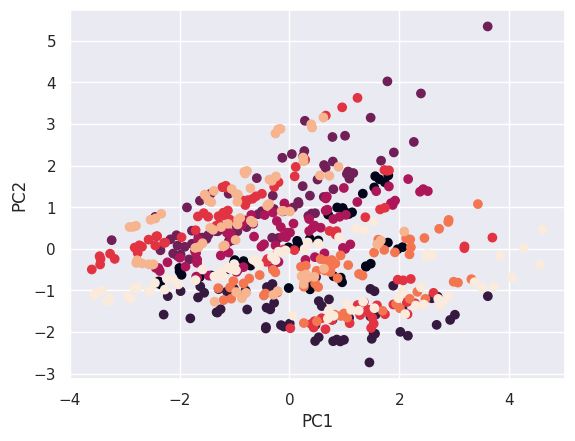

In [31]:
plt.figure()
classes=pd.factorize(classes)
plt.scatter(datatrans[:,0],datatrans[:,1],c=classes[0])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


Linear discriminant analysis (LDA)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 571, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

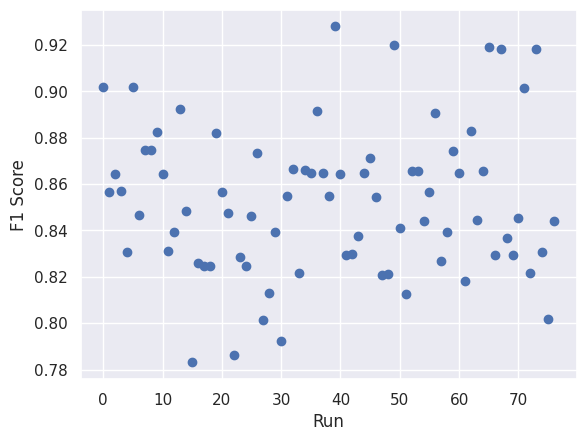

In [33]:
#Doing LDA using holdout method (using n clusters - 2, from k-mean = 5)
lda=LDA()

parameters = { 'n_components': np.arange(3) }

iterations=np.arange(77)
performance=[]

for k in iterations:
    #Split data
    X_train, X_test, y_train, y_test = train_test_split(datatrans,
                                                        pred_kmeans,
                                                        test_size=0.2)

    #Set up parameter evaluation
    lda_search=GridSearchCV(estimator=lda,
                            param_grid=parameters,
                            cv=10,
                            verbose=0,
                            return_train_score=True,
                            n_jobs=-1)
#Apply
    lda_search.fit(X_train,y_train)
    #Outputs
    param=lda_search.best_params_
    paramout=param['n_components']#Get output of dict;
    out=pd.DataFrame(lda_search.cv_results_)
    #Evaluate on test
    lda_out=LDA(n_components=paramout)

    lda_out.fit(X_train,y_train)
    pred=lda_out.predict(X_test)
    # this is f1 score instead of confusion matrix
    perf=f1_score(y_test,pred,average= 'weighted')
    performance=np.append(performance,perf)

plt.figure()
plt.scatter (range(77),performance)
plt.xlabel('Run')
plt.ylabel('F1 Score')
plt.show()

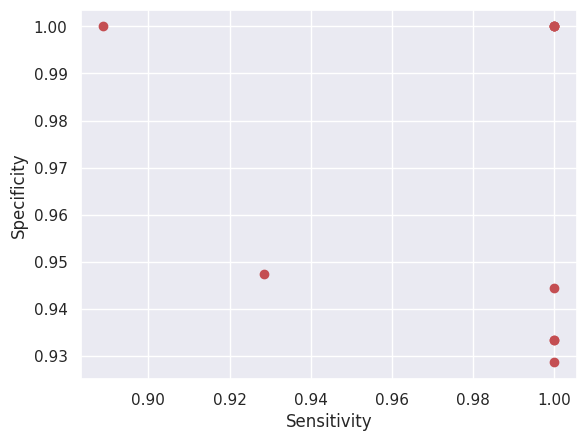

In [34]:
#Doing LDA using KFold 10 and k-mean = 5
cv=KFold(n_splits=10,shuffle=True)

sensitivity=np.array([])
specificity=np.array([])

for train, test in cv.split(datatrans):
    lda1=LDA(n_components=3)
    lda1.fit(datatrans[train,:],pred_kmeans[train])
    pred=lda1.predict(datatrans[test,:])
    conf=confusion_matrix(pred_kmeans[test],pred)
    sens=conf[0,0]/[conf[0,0]+conf[0,1]]
    spec=conf[1,1]/[conf[1,1]+conf[1,0]]
    sensitivity=np.concatenate([sensitivity,sens])
    specificity=np.concatenate([specificity,spec])

plt.figure()
plt.scatter(sensitivity,specificity,c='r')
plt.xlabel('Sensitivity')
plt.ylabel('Specificity')
plt.show()